NLP project: Using Machine Learning to predict if a tweet is about a real disaster or not

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [129]:
df = pd.read_csv('train.csv')
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [131]:
df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [132]:
df.iloc[200:220]

,id,keyword,location,text,target
200,281,ambulance,VISIT MY YOUTUBE CHANNEL.,HAPPENING NOW - HATZOLAH EMS AMBULANCE RESPOND...,0
201,283,ambulance,Lexington,http://t.co/FueRk0gWui Twelve feared killed in...,1
202,285,ambulance,NaN,http://t.co/X5YEUYLT1X Twelve feared killed in...,1
203,287,ambulance,USA,Twelve feared killed in Pakistani air ambulanc...,1
204,289,ambulance,"Hannover, Germany",Twelve feared killed in Pakistani air ambulanc...,1
205,290,ambulance,NaN,What's the police or ambulance number in Lesot...,0
206,291,ambulance,NaN,@medic914 @AACE_org I am surprised we still ca...,0
207,293,ambulance,Playa,http://t.co/J8TYT1XRRK Twelve feared killed in...,1
208,294,ambulance,"Davidson, NC",People who try to j-walk while an ambulance is...,0
209,296,annihilated,Higher Places,The episode where Trunks annihilated Freiza is...,0


In [133]:
df.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Vectorizing

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, max_features=70000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w+', use_idf=True, 
                            smooth_idf=True, sublinear_tf=True, stop_words = 'english')
vectors = vectorizer.fit_transform(df['text'])
vectors.shape

(7613, 6364)

In [135]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 

In [136]:
X_train, X_test, y_train, y_test = train_test_split(vectors, df['target'], test_size=0.1,random_state=73)

In [137]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver= 'sag',max_iter=200,random_state=73)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.7795649155288129
0.7900262467191601


In [138]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rfc = RandomForestClassifier()

# Run the grid search
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

KeyboardInterrupt: 

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.7451483546029058

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train_scal =scaler.transform(X_train)
X_test_scal =scaler.transform(X_test)

mlp = MLPClassifier(max_iter=500,
                   activation='relu',
                   hidden_layer_sizes = (150, 150, 150),
                   random_state=73,
                   learning_rate_init=0.01)
mlp.fit(X_train_scal, y_train)
print(mlp.score(X_train_scal, y_train))
print(mlp.score(X_test_scal, y_test))

0.9757699605896949
0.7270341207349081


In [ ]:
#best score is archieved with logistic regression

Cleaning the data to see if it improves performance

In [139]:
import re
import unicodedata

In [140]:
def replace_url_in_df_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    # Use a regular expression to match URLs, which start with "http" or "https" and contain letters, numbers, or certain special characters
    df[column] = df[column].str.replace(r"(http|https)://[^\s]+", "[U]")
    return df

In [141]:
def replace_mention_in_df_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    # Use a regular expression to match URLs, which start with "http" or "https" and contain letters, numbers, or certain special characters
    df[column] = df[column].str.replace(r"@\w+", "[M]")
    return df

In [142]:
def remove_special_characters(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^\w\s!?#\.\[\]]', '', x))
    return df

In [143]:
def remove_non_ascii_in_df_column(df, column):
    """Remove all non-ASCII characters from a column in a DataFrame."""
    df[column] = df[column].apply(lambda x: "".join(char for char in x if ord(char) < 128))
    return df

In [144]:
def remove_nan_in_df_column(df, column):
    """Remove all occurrences of the string "nan" from a column in a DataFrame."""
    df[column] = df[column].apply(lambda x: x.replace("nan", ""))   
    return df

In [145]:
def remove_special_cases_in_df_column(df, column):
    """Remove all occurrences of the string "%20" from a column in a DataFrame."""
    df[column] = df[column].apply(lambda x: x.replace("%20", " "))
    df[column] = df[column].apply(lambda x: x.replace("&amp;", " "))
    df[column] = df[column].apply(lambda x: x.replace("\n", " "))
    df[column] = df[column].apply(lambda x: x.replace("@", ""))
    df[column] = df[column].apply(lambda x: x.replace("#", ""))
    df[column] = df[column].apply(lambda x: x.replace("Ûª", "'"))
    df[column] = df[column].apply(lambda x: x.replace("Û÷", "'"))
    df[column] = df[column].apply(lambda x: x.replace("&lt;", ""))
    df[column] = df[column].apply(lambda x: x.replace("&gt", ""))
    df[column] = df[column].apply(lambda x: x.replace("[KB][N][KE]", ""))
    df[column] = df[column].apply(lambda x: x.replace("[LB][N][LE]", ""))
    #df[column] = df[column].apply(lambda x: x.strip()) #remove whitespace
    
    return df

In [146]:
def clean_df(df):

    # convert everything to lower case -> no seems to remove signal
    df['text'] = df.text.str.lower()
    df['keyword'] = df.keyword.str.lower()
    df['location'] = df.location.str.lower()

    df = df.fillna(' ')
    df = remove_nan_in_df_column(df, 'keyword')
    df = remove_nan_in_df_column(df, 'location')
    
    df = replace_mention_in_df_column(df, 'text')
    
    df = remove_special_cases_in_df_column(df, 'keyword')
    df = remove_special_cases_in_df_column(df, 'location')
    df = remove_special_cases_in_df_column(df, 'text')

    df = remove_special_characters(df, 'text')
    df = remove_non_ascii_in_df_column(df, 'text')
    df = replace_url_in_df_column(df, 'text')

    return df

In [147]:
train = clean_df(df)

C:\Users\batch-pc\AppData\Local\Temp\ipykernel_16396\2210171115.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r"@\w+", "[M]")


In [148]:
train

,id,keyword,location,text,target
0,1,,,our deeds are the reason of this earthquake ma...,1
1,4,,,forest fire near la ronge sask. canada,1
2,5,,,all residents asked to shelter in place are be...,1
3,6,,,13000 people receive wildfires evacuation orde...,1
4,7,,,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,,,two giant cranes holding a bridge collapse int...,1
7609,10870,,,[M] [M] the out of control wild fires in calif...,1
7610,10871,,,m1.94 [0104 utc]?5km s of volcano hawaii. http...,1
7611,10872,,,police investigating after an ebike collided w...,1


In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, max_features=70000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w+', use_idf=True, 
                            smooth_idf=True, sublinear_tf=True, stop_words = 'english')
vectors = vectorizer.fit_transform(train['text'])
vectors.shape

(7613, 6272)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(vectors, train['target'], test_size=0.1,random_state=73)

In [151]:
clf = linear_model.LogisticRegression(solver= 'sag',max_iter=200,random_state=73)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.783037089025631
0.7939632545931758


In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
result = confusion_matrix(y_test, pred)
print(result)

[[388  40]
 [117 217]]


<AxesSubplot: >

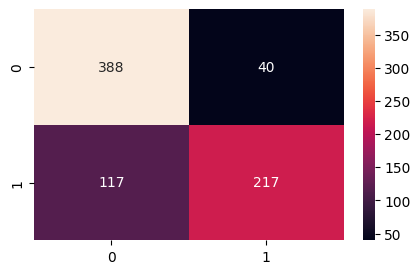

In [154]:
plt.figure(figsize=(5,3))
sns.heatmap(result,annot=True, fmt='g')

Test predictions and sample submission:

In [155]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [158]:
test = clean_df(test)

C:\Users\batch-pc\AppData\Local\Temp\ipykernel_16396\2210171115.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r"@\w+", "[M]")


In [163]:
pr= vectorizer.transform(test['text'])
pr.shape

(3263, 6272)

In [164]:
predictions = clf.predict(pr)

In [166]:
len(predictions)

3263

In [168]:
test['predictions']=predictions

In [187]:
submission = pd.DataFrame(test['id'])
submission

,id
0,0
1,2
2,3
3,9
4,11
...,...
3258,10861
3259,10865
3260,10868
3261,10874


In [188]:
submission["target"]= predictions

In [189]:
submission

,id,predictions
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [191]:
submission.to_csv('submission.csv',index=False)